<a href="https://colab.research.google.com/github/ranjithkumar910/credit-card-fraud-detection/blob/main/final_credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **credit card fraud dection**

> 



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [377]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [10]:
pwd

'/content'

In [9]:
! git clone https://github.com/ranjithkumar910/credit-card-fraud-detection.git

Cloning into 'credit-card-fraud-detection'...


In [4]:
import pandas as pd


**Exploratory data analysis**




In [ ]:
df=pd.read_csv("/content/creditcardnewnew.csv") 

In [385]:
df.shape,df.shape[0],df.shape[1]

((284807, 31), 284807, 31)

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**checking for null values**

In [13]:
df.isnull().sum().sum()


0

there is no **null** values , if you have null values in your data. if it is regression problem you can replace with mean or median , if it is classification problem you can remove it . if your data is sufficient . 

In [14]:
df.shape

(284807, 31)

In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

calss 1 is very less compared to calls 0 , as there is very high difference , it is considered as **imbalance data**

***checking the classes w.r.t percentages ***

---



In [17]:
df['Class'].value_counts()[0]/len(df)*100



99.82725143693798

In [18]:
df['Class'].value_counts()[1]/len(df)*100

0.1727485630620034

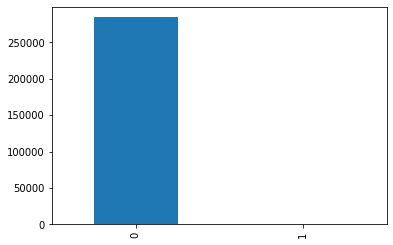

In [19]:
df['Class'].value_counts().plot(kind='bar')

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

**visualization of time and amount feature**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


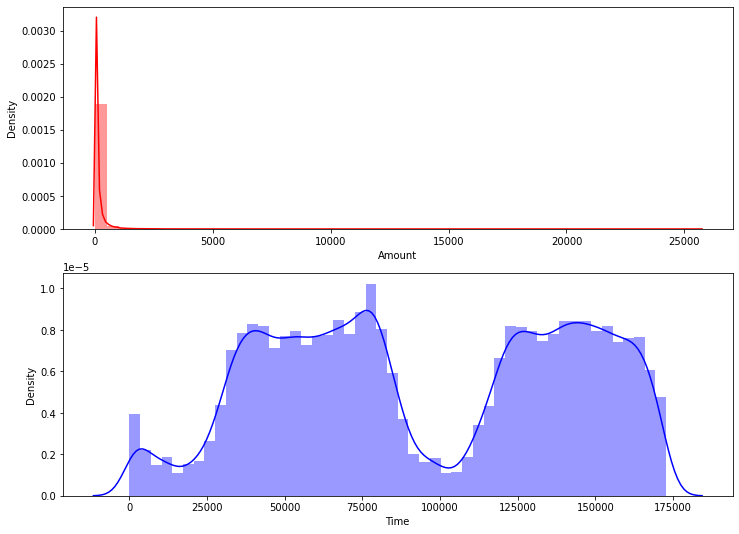

In [21]:
fig , ax=plt.subplots(2,1,figsize=(12,9))
sns.distplot(df.Amount,color='r',ax=ax[0])
sns.distplot(df.Time,color='b',ax=ax[1])

# feature engineering ( performing scaling )

In [22]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)



In [23]:

df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [24]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


as we know that we are dealing with **imbalanced data**. there are two types of dealing it
# 1) under sampling
# 2) oversampling

***undersampling:-*** Randomly remove samples from the majority class, with or without replacement. This is one of the earliest techniques used to alleviate imbalance in the dataset, however, it may increase the variance of the classifier and may potentially discard useful or important samples

**oversampling:-**Random Oversampling involves supplementing the training data with multiple copies of some of the minority classes


There are a number of methods available to oversample a dataset used in a typical classification problem (using a classification algorithm to classify a set of images, given a labelled training set of images). The most common technique is known as SMOTE: Synthetic Minority Over-sampling Technique.

When upsampling using SMOTE(Synthetic Minority Over-sampling Technique.) I don’t create duplicate observations. However, because the SMOTE algorithm uses the nearest neighbors of observations to create synthetic data

# under sampling

In [25]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
226827,-0.097813,0.706329,2.373885,-1.353682,-1.884191,-2.001182,-0.415872,-0.092444,-0.985310,-0.068764,-1.591246,1.889835,-0.309704,-1.294996,-0.683220,0.253716,-0.266248,-0.040673,-0.168939,1.064295,0.358328,-0.446595,0.034831,0.460737,-0.019708,-0.316435,0.175262,0.084424,-0.031735,-0.076978,0
61787,4.722979,-0.407747,-1.554216,1.694229,-0.903334,2.425436,-2.899787,0.133028,-0.286226,0.555945,-1.394918,-2.892612,1.962236,-2.385263,0.458337,-3.724543,1.843978,-2.013924,-2.815600,-1.092290,0.139687,-0.032334,0.493436,0.733393,0.202350,0.492054,-0.183791,-0.199917,0.395201,0.027693,1
210176,3.602320,0.624749,1.682710,-1.622179,-1.933969,-0.872610,-0.581482,-0.767186,0.141087,-0.336889,-0.751669,0.874152,0.273066,0.385033,-0.063616,0.507833,-0.799170,-1.398049,-0.249326,1.092237,-0.004843,-0.035588,-0.341682,-1.039921,-0.003685,-0.457877,-0.378915,1.121946,-0.177017,-0.044143,0
77348,-0.307273,-0.325251,-1.271244,2.462675,-2.851395,2.324480,-1.372245,-0.948196,-3.065234,1.166927,-2.268771,-4.881143,2.255147,-4.686387,0.652375,-6.174288,0.594380,-4.849692,-6.536521,-3.119094,1.715494,0.560478,0.652941,0.081931,-0.221348,-0.523582,0.224228,0.756335,0.632800,0.250187,1
27627,-0.042479,-0.588094,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,-2.834871,2.802005,-4.392732,-1.369671,-5.327287,0.163159,-1.359389,-5.095183,-0.338013,-0.124138,0.329342,0.469212,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


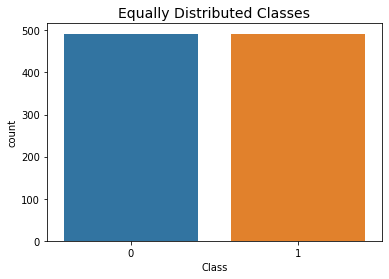

In [26]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))




sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [27]:
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

previously we have 284315 non fraud cases or class 1 , but now we have 492.. now we have well balanced data

A **correlation matrix** is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables

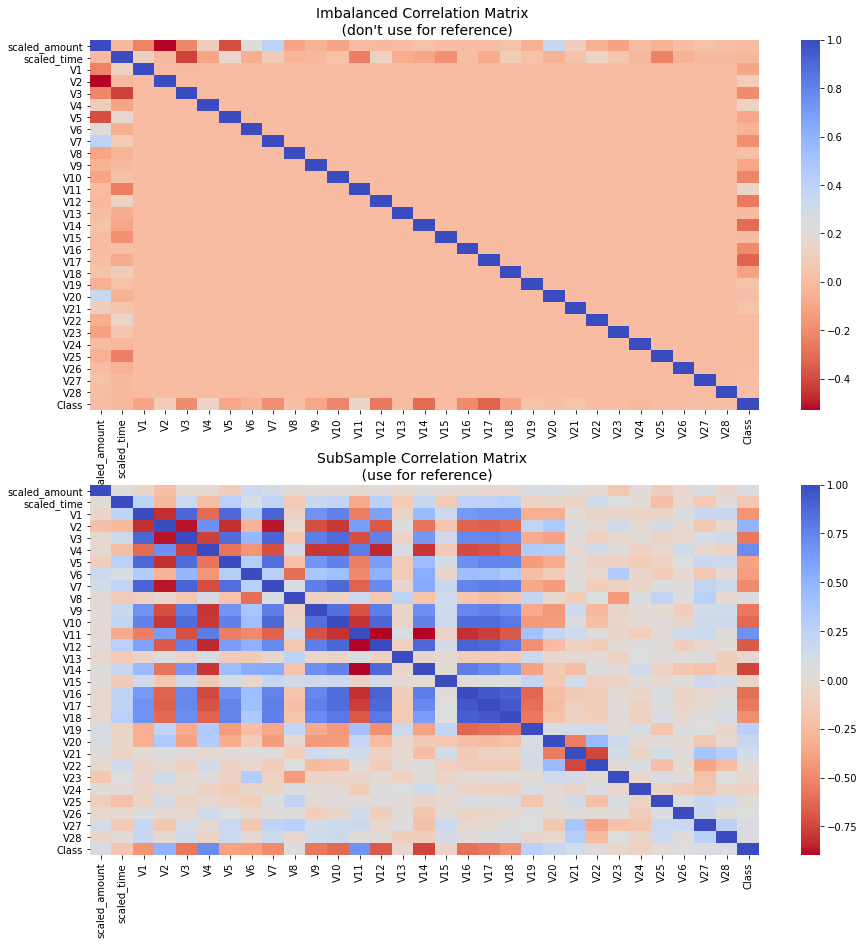

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()


In [29]:
sub_sample_corr = new_df.corr()

lets take the features which are highly correlated with target variable.here iam using 0.5 as threshold  

In [30]:
#negative correlations smaller than -0.5
sub_sample_corr[sub_sample_corr.Class <-0.5]

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
V3,-0.013749,0.163724,0.884322,-0.870874,1.000000,-0.768916,0.860608,0.467880,0.890735,-0.170109,0.774648,0.860245,-0.716642,0.760978,-0.073133,0.656058,0.166313,0.730682,0.739915,0.706862,-0.328473,-0.371685,0.025525,-0.076860,-0.021774,0.009019,-0.066220,-0.017502,0.102221,0.134141,-0.567056
V9,0.029009,0.181950,0.682793,-0.722937,0.774648,-0.795519,0.667143,0.370689,0.771883,-0.079448,1.000000,0.850607,-0.710122,0.771937,-0.049231,0.689657,0.151295,0.737766,0.767210,0.714758,-0.340142,-0.419874,0.160936,-0.251996,-0.052897,0.011307,0.005887,-0.125795,0.129432,0.146433,-0.565662
V10,0.013741,0.233150,0.756938,-0.790448,0.860245,-0.788494,0.769880,0.428135,0.875919,-0.055034,0.850607,1.000000,-0.803607,0.882727,-0.055396,0.760187,0.175465,0.858577,0.857145,0.805519,-0.422445,-0.410806,0.083465,-0.223129,-0.047213,-0.004851,0.023435,-0.031440,0.154919,0.151019,-0.623109
V12,0.023477,0.279096,0.605478,-0.680986,0.760978,-0.836117,0.627300,0.509864,0.724838,-0.168662,0.771937,0.882727,-0.897083,1.000000,-0.100806,0.879386,0.107996,0.900446,0.876793,0.800782,-0.464485,-0.243961,-0.075743,-0.119666,0.010765,0.042149,0.040981,-0.108691,-0.028263,0.009168,-0.680777
V14,0.040035,0.197156,0.457127,-0.581341,0.656058,-0.794270,0.439260,0.537475,0.550118,-0.189509,0.689657,0.760187,-0.890735,0.879386,-0.035574,1.000000,0.013687,0.781039,0.730544,0.625223,-0.374391,-0.149357,-0.226640,0.051428,0.024354,0.134813,-0.064338,-0.171067,-0.204937,-0.119742,-0.752297
V16,-0.022377,0.254227,0.646089,-0.644857,0.730682,-0.729415,0.700984,0.436367,0.751378,-0.177975,0.737766,0.858577,-0.808786,0.900446,-0.117139,0.781039,0.021997,1.000000,0.953528,0.911192,-0.630676,-0.209922,-0.152489,-0.112657,-0.000222,-0.049962,0.074192,-0.065669,-0.025503,0.021465,-0.599702
V17,-0.023859,0.249751,0.684970,-0.655037,0.739915,-0.706428,0.755186,0.427136,0.773115,-0.222660,0.767210,0.857145,-0.772126,0.876793,-0.134368,0.730544,0.051954,0.953528,1.000000,0.941806,-0.601086,-0.232698,-0.096817,-0.131338,0.017949,-0.080901,0.048288,-0.043639,0.000303,0.060547,-0.557260


In [31]:
#positive correlations greater than 0.5
sub_sample_corr[sub_sample_corr.Class>0.5]

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
V2,-0.210305,-0.248051,-0.821671,1.000000,-0.870874,0.690870,-0.810731,-0.283267,-0.865268,-0.022654,-0.722937,-0.790448,0.628780,-0.680986,0.048857,-0.581341,-0.175281,-0.644857,-0.655037,-0.627977,0.232526,0.338777,0.047260,-0.007326,0.133883,-0.002408,0.109863,-0.009460,-0.160119,-0.013049,0.500721
V4,-0.009533,-0.223582,-0.620169,0.690870,-0.768916,1.000000,-0.583929,-0.439509,-0.714287,0.108724,-0.795519,-0.788494,0.790663,-0.836117,0.084351,-0.794270,-0.152152,-0.729415,-0.706428,-0.645577,0.326061,0.316762,-0.021175,0.124954,0.026588,-0.086111,-0.029457,0.142904,-0.011735,-0.071010,0.703957
V11,-0.014762,-0.344004,-0.537783,0.628780,-0.716642,0.790663,-0.540345,-0.495168,-0.645566,0.174376,-0.710122,-0.803607,1.000000,-0.897083,0.077601,-0.890735,-0.083741,-0.808786,-0.772126,-0.681043,0.403206,0.208850,0.142618,0.023052,-0.035904,-0.125236,0.021350,0.145848,0.175792,0.026488,0.682564
Class,0.082546,-0.170280,-0.448220,0.500721,-0.567056,0.703957,-0.382044,-0.395128,-0.483554,0.061629,-0.565662,-0.623109,0.682564,-0.680777,-0.029832,-0.752297,-0.058320,-0.599702,-0.557260,-0.470723,0.274624,0.199211,0.130262,0.025318,-0.025218,-0.087999,0.009402,0.052219,0.084368,0.077198,1.000000


Text(0.5, 0.98, 'Features With High Positive Correlation')

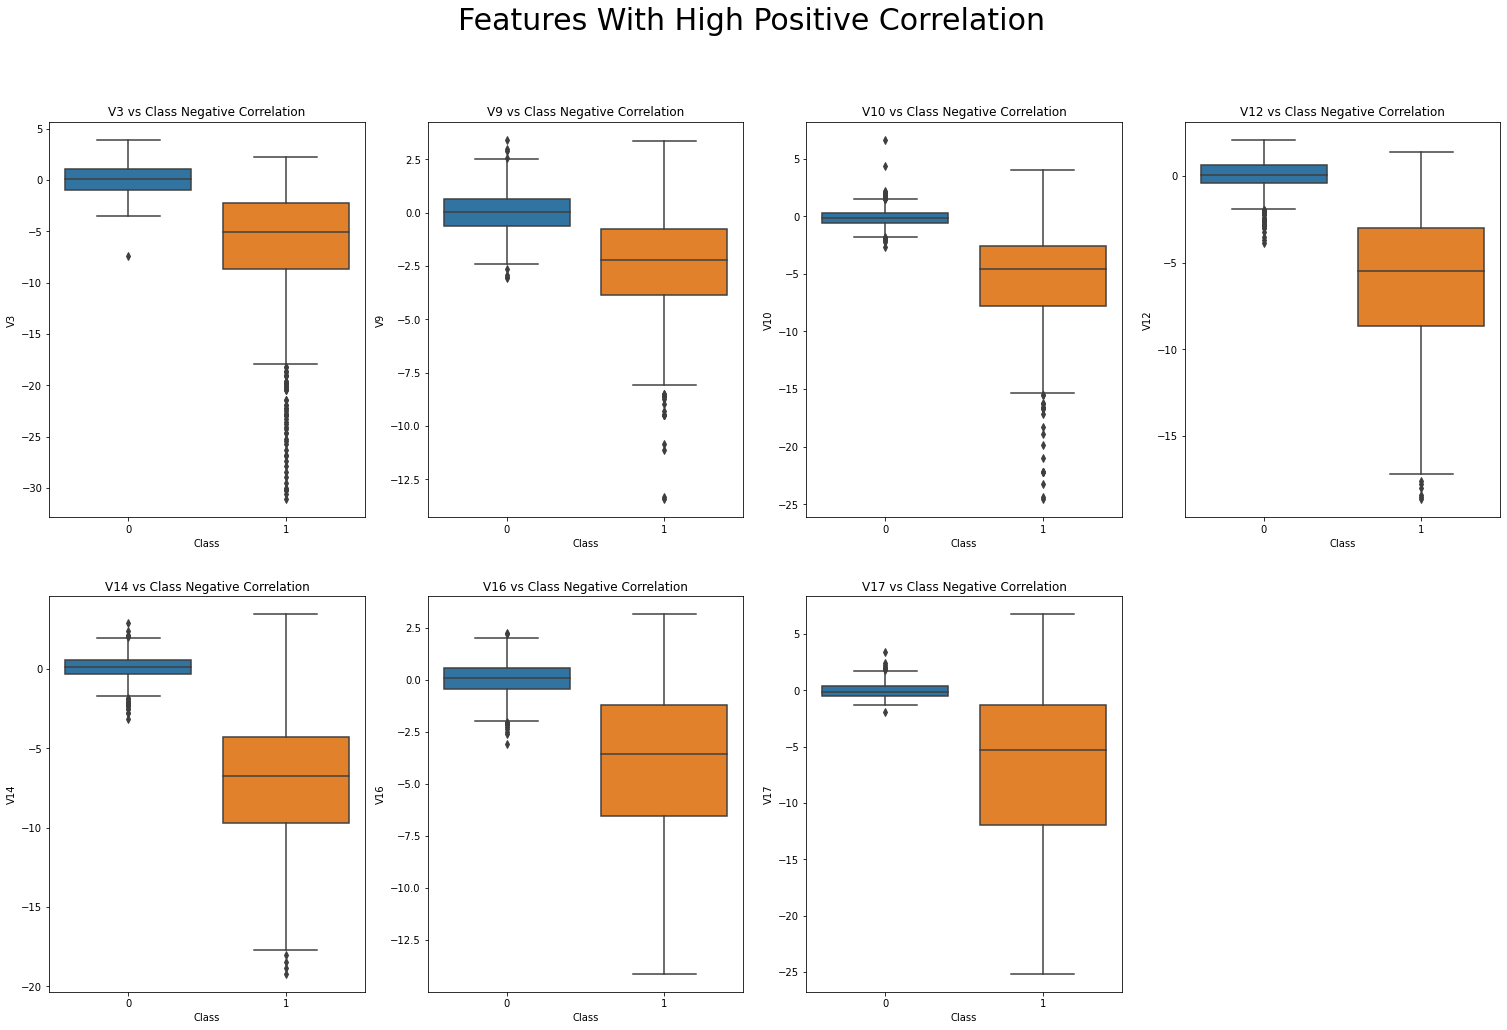

In [32]:
f, axes = plt.subplots(nrows=2,ncols=4,figsize=(26,16))

sns.boxplot(x='Class',y='V3',data=new_df, ax=axes[0,0])
axes[0,0].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V9',data=new_df,ax=axes[0,1])
axes[0,1].set_title('V9 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df, ax=axes[0,2])
axes[0,2].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=new_df,ax=axes[0,3])
axes[0,3].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V14',data=new_df, ax=axes[1,0])
axes[1,0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V16',data=new_df,ax=axes[1,1])
axes[1,1].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V17',data=new_df, ax=axes[1,2])
axes[1,2].set_title('V17 vs Class Negative Correlation')

f.delaxes(axes[1,3])
f.suptitle('Features With High Positive Correlation', size=30)


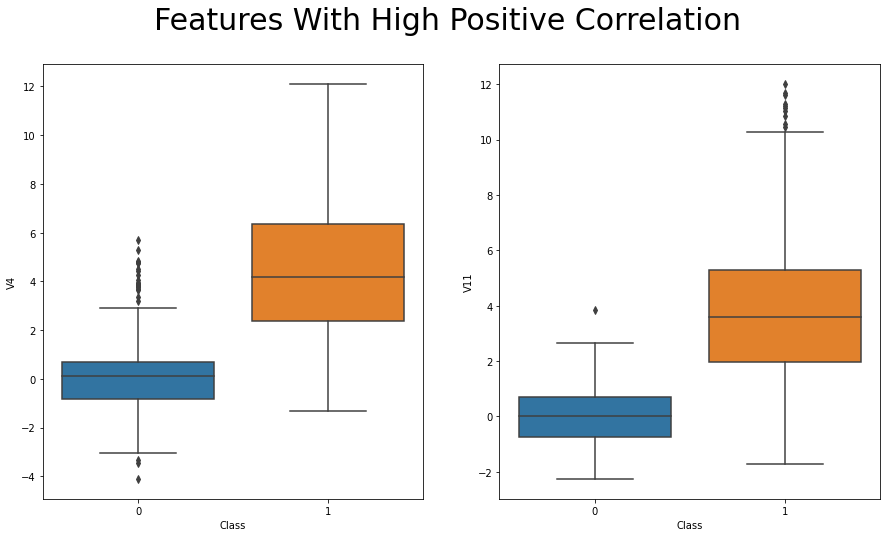

In [388]:
f,axes=plt.subplots(1,2,figsize=(15,8))
f.suptitle('Features With High Positive Correlation', size=30)
sns.boxplot(x='Class',y='V4',data=new_df, ax=axes[0])
sns.boxplot(x='Class',y='V11',data=new_df, ax=axes[1])

# **outliers removal**

impact of outliers effects badly on performance of alogirthms. there are some alogirthms which handls well, and some are not. so it is better to remove outliers. here iam using **box plot** to remove outliers

In [34]:
Q1=new_df.quantile(0.25)
Q3=new_df.quantile(0.75)
IQR=Q3-Q1
df2=new_df[~((new_df < (Q1-2.5*IQR))| (new_df >(Q3+2.5*IQR))).any(axis=1)]
len_after = len(df2)
len_before = len(new_df)
len_difference = len(new_df) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 984 transactions by 288 transactions to 696 transactions.


In [35]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time


# **Dimensionality Reduction**

In [36]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


T-SNE took 5.7 s
PCA took 0.012 s
Truncated SVD took 0.0064 s


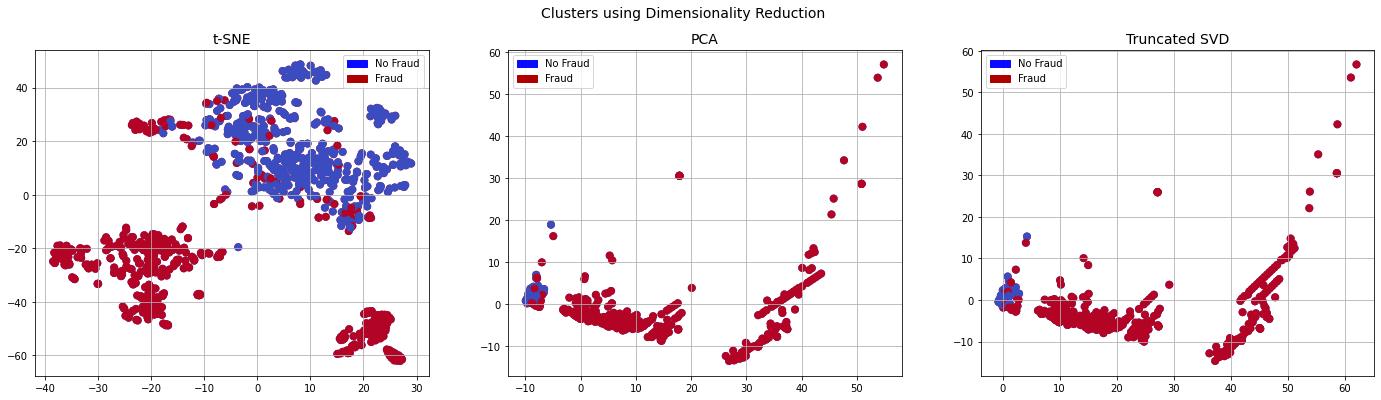

In [37]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)

ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

# model building

this is the most important step in ML. we all love to bulid models because it is easy,[ simply using fit and predict functions. thanks to sklearn for making so simple ]. in this case study or project iam using few alogrithms , you can use any , but accuracy might change , ***here iam using metrics accuracy and auc score  ***

In [389]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [41]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((738, 30), (246, 30), (738,), (246,))

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve,recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

**over fitting:-** Overfitting means model has High accuracy score on training data but low score on test data.

**Underfitting:-** Underfitting means model has low accuracy score on training data and test data both.

**What is Right Fit?**

Model is considered to be RightFit. when it is generalised and behaves more or less in the same way as on training data and on test data.
Model accuracy should be almost same on training and test data.

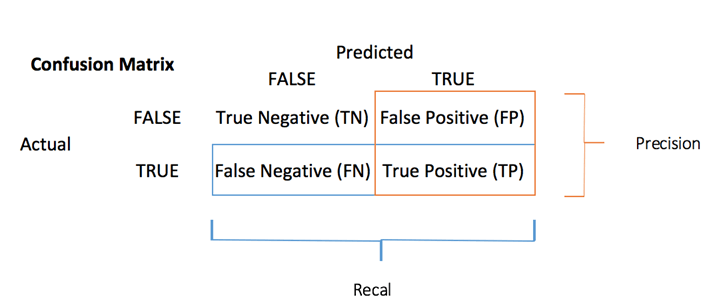

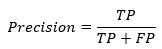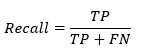

TP: True Positive: Predicted values correctly predicted as actual positive

FP: Predicted values incorrectly predicted an actual positive. i.e., Negative values predicted as positive

FN: False Negative: Positive values predicted as negative

TN: True Negative: Predicted values correctly predicted as an actual negative

please go through the link for detailed classification ofn confusion matrix(recall ,precision, roc and auc ) [link text](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

**svm model**

In [124]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc_model=SVC(random_state=42)
svc_model.fit(X_train,y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [125]:
svc_predict=svc_model.predict(X_test)
print('*'*100)
print('confusion matrix:-',confusion_matrix(y_test,svc_predict))

print('accuracy score for svm',accuracy_score(y_test,svc_predict)*100)
print('*'*100)
print('roc score for svm',roc_auc_score(y_test,svc_predict)*100)
print('*'*100)


****************************************************************************************************
confusion matrix:- [[109   0]
 [ 25 112]]
accuracy score for svm 89.83739837398373
****************************************************************************************************
roc score for svm 90.87591240875912
****************************************************************************************************


we need to check whether your model is ***under fitting or over fitting ***. so we need to test your model on both traning and testing data. if there is high difference then your model is ***under fitting .*** if we have high traning accuracy then it is ***over fitting***. so differnce should be ***equal or less ***

In [390]:
tranning_accuracy=svc_model.predict(X_train)
print('tranning_accuracy using svm',accuracy_score(y_train,tranning_accuracy)*100,"%")
print('tranning_roc_auc score using svm',roc_auc_score(y_train,svc_model.predict(X_train))*100,"%")

tranning_accuracy using svm 94.3089430894309 %
tranning_roc_auc score using svm 94.12569411245542 %


if we see the ***accuracy on traning is  around 94 %***,where on ***testing is around 89%.*** there is lesser difference so your ***model has right fit***. same in the case of roc also

## ***hyper tuning***

hyper tuning of models ***defintely increases performance metrics and also reduces overfitting*** if your model perfomance is **not increased after hyper tuning**,it means **you are not providing the enough parameters**. here iam using girdsearchv 

In [395]:
from sklearn.model_selection import GridSearchCV

#kernel=['poly','rbf','sigmoid']
#C =[0.1,10,15,20,30,40,50,60,70,80,90,100]
#gamma=[10,9,8,7,6,5,4,3,2,1, 0.1, 0.001, 0.0001]
#random_state=[42]
#grid_svc=dict(kernel=kernel,C=C,gamma=gamma,random_state=random_state)
#param_grid = {'C': [0.1, 1],  
              #'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              #'kernel': ['rbf']
              #,'random_state':[42]} 
              
hparams = {"C": [0.1,2,3,10], 
                   "kernel": [ "rbf", "poly",'sigmoid'],'gamma':['scale'],
                   'random_state':[42]}
              
gird_search_svc=GridSearchCV(svc_model,param_grid=hparams,n_jobs=-1,scoring='accuracy')



In [396]:
gird_svm_results=gird_search_svc.fit(X_train,y_train)

In [397]:
gird_svm_results.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 42}

In [398]:
print('acuracy for svm after hyper tunning',accuracy_score(y_test,gird_svm_results.predict(X_test))*100,'%')
print('*'*100)
print('roc_auc for svm after hyper tunning',roc_auc_score(y_test,gird_svm_results.predict(X_test))*100,'%')

print('*'*100)

acuracy for svm after hyper tunning 91.46341463414635 %
****************************************************************************************************
roc_auc for svm after hyper tunning 92.24201433067702 %
****************************************************************************************************


after hyper tuning model accuracy and roc_auc increased.lets check your model after hypertuning on tranning data and compare with test data

In [131]:
print('tranning_accuracy score using svm after hyper tunning',accuracy_score(y_train,gird_svm_results.predict(X_train))*100,"%")
print('tranning_roc_auc score using svm after hyper tunning',roc_auc_score(y_train,gird_svm_results.predict(X_train))*100,"%")

tranning_accuracy score using svm after hyper tunning 95.52845528455285 %
tranning_roc_auc score using svm after hyper tunning 95.40359651380871 %


accuracy and roc_auc score after hyper tuning on traning and testing data is almost equal. this means we have right fit 

**lets see all results using svm**

In [132]:
print('confusion matrix:-',confusion_matrix(y_test,svc_predict))

print('accuracy score for svm',accuracy_score(y_test,svc_predict)*100)

print('roc score for svm',roc_auc_score(y_test,svc_predict)*100)



print('*'*40,'after hyper tunning','*'*30)
print('confusion matrix after hyper tunning:-',confusion_matrix(y_test,gird_svm_results.predict(X_test)))

print('acuracy for svm after hyper tunning',accuracy_score(y_test,gird_svm_results.predict(X_test))*100,'%')

print('roc_auc for svm after hyper tunning',roc_auc_score(y_test,gird_svm_results.predict(X_test))*100,'%')


confusion matrix:- [[109   0]
 [ 25 112]]
accuracy score for svm 89.83739837398373
roc score for svm 90.87591240875912
**************************************** after hyper tunning ******************************
confusion matrix after hyper tunning:- [[108   1]
 [ 20 117]]
acuracy for svm after hyper tunning 91.46341463414635 %
roc_auc for svm after hyper tunning 92.24201433067702 %


**decision tress**

In [399]:
dec_model=DecisionTreeClassifier(random_state=42)
dec_model.fit(X_train,y_train)
print('accuracy score for decision tress',accuracy_score(y_test,dec_model.predict(X_test))*100,'%')
print('roc_auc score for decision tress',roc_auc_score(y_test,dec_model.predict(X_test))*100,'%')

accuracy score for decision tress 91.05691056910568 %
roc_auc score for decision tress 91.40829036362419 %


In [135]:
dec_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [95]:
print('traning accuracy using decision trees',accuracy_score(y_train,dec_model.predict(X_train))*100,'%')
print('traning roc_auc using decision trees',roc_auc_score(y_train,dec_model.predict(X_train))*100,'%')


traning accuracy using decision trees 100.0 %
traning roc_auc using decision trees 100.0 %


you notice that your model gives **100%** acc or auc score on **traning data**,**and** around **90%** acc and roc score on **testing data**. your model is **overfitting** because of **high traning accuracy** and roc score

**hypertuning**

In [136]:
params = {
          
          'min_samples_split': [3,4,5,7], 
          'min_samples_leaf':[2,3,4,5,6,7,8],
          'criterion' : ['gini','entropy'],
          'max_depth':[1,2,5,7],'random_state':[42]
          }

In [119]:
grid_para_dec=GridSearchCV(dec_model,param_grid=params,scoring='accuracy',n_jobs=-1)

In [137]:
grid_para_dec.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [138]:
grid_para_dec.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'random_state': 42}

In [139]:
print('accuracy sore for decision trees after hyper tuning',accuracy_score(y_test,grid_para_dec.predict(X_test))*100,'%')
print('roc_auc score for decision trees after hyper tuning',roc_auc_score(y_test,grid_para_dec.predict(X_test))*100,'%')

accuracy sore for decision trees after hyper tuning 91.46341463414635 %
roc_auc score for decision trees after hyper tuning 92.24201433067702 %


In [140]:
print('traning accuracy after hyper tunning for decision trees',accuracy_score(y_train,grid_para_dec.predict(X_train))*100,'%')
print('traning roc_auc sore after hyper tunning for decision trees',roc_auc_score(y_train,grid_para_dec.predict(X_train))*100,'%')


traning accuracy after hyper tunning for decision trees 94.98644986449864 %
traning roc_auc sore after hyper tunning for decision trees 94.80932592946714 %


before hypertuning we have **100%** traning acc or auc score,around **91%** acc or auc score on testing data 

but after HT traning acc,roc is around **95.00** and  and acc,roc on testing data after HT is around **91**..after ht we reduced overfitting of model .  

**total results for decision trees**

In [141]:
print('confusion matrix:-',confusion_matrix(y_test,dec_model.predict(X_test)))
print('accuracy score for decision tress',accuracy_score(y_test,dec_model.predict(X_test))*100,'%')
print('roc_auc score for decision tress',roc_auc_score(y_test,dec_model.predict(X_test))*100,'%')
print('*'*40,'after hyper tunning','*'*30)
print('accuracy sore for decision trees after hyper tuning',accuracy_score(y_test,grid_para_dec.predict(X_test))*100,'%')
print('roc_auc score for decision trees after hyper tuning',roc_auc_score(y_test,grid_para_dec.predict(X_test))*100,'%')
print('confusion matrix:-',confusion_matrix(y_test,grid_para_dec.predict(X_test)))


confusion matrix:- [[103   6]
 [ 16 121]]
accuracy score for decision tress 91.05691056910568 %
roc_auc score for decision tress 91.40829036362419 %
**************************************** after hyper tunning ******************************
accuracy sore for decision trees after hyper tuning 91.46341463414635 %
roc_auc score for decision trees after hyper tuning 92.24201433067702 %
confusion matrix:- [[108   1]
 [ 20 117]]


**random forest**

In [254]:
from sklearn.ensemble import RandomForestClassifier
ran_model=RandomForestClassifier(random_state=42)
ran_model.fit(X_train,y_train)

print(confusion_matrix(y_test,ran_model.predict(X_test)))
print('accuracy using random forest',accuracy_score(y_test,ran_model.predict(X_test))*100,'%')
print('roc score using random forest',roc_auc_score(y_test,ran_model.predict(X_test))*100,'%')

[[109   0]
 [ 20 117]]
accuracy using random forest 91.869918699187 %
roc score using random forest 92.7007299270073 %


In [255]:
print('traning accuracy using random forest',accuracy_score(y_train,ran_model.predict(X_train))*100,'%')
print('traning roc_auc using  random forest',roc_auc_score(y_train,ran_model.predict(X_train))*100,'%')

traning accuracy using random forest 100.0 %
traning roc_auc using  random forest 100.0 %


you notice that your model gives **100**% acc or auc score on traning data,and **93-94**% acc and roc score on testing data. your model is **overfitting** because of **high traning** accuracy & roc score

# **tunning**

In [256]:
ran_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [379]:
params = {
          
          'max_depth':[5,6,7,9,],
          'min_samples_leaf':[2,3,4,5,6,7],
          'min_samples_split':[4,5,6,8,7], 
          
          'n_jobs':[-1],'random_state':[42]}

In [380]:
ran_grid=GridSearchCV(ran_model,param_grid=params,scoring='accuracy')
ran_grid.fit(X_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

In [381]:
ran_grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_jobs': -1,
 'random_state': 42}

In [382]:
print('accuracy of random forest after HT',accuracy_score(y_test,ran_grid.predict(X_test))*100,'%')
print('roc  of random forest after HT',roc_auc_score(y_test,ran_grid.predict(X_test))*100,'%')

accuracy of random forest after HT 92.27642276422763 %
roc  of random forest after HT 93.06569343065694 %


**total results for random forest**

In [387]:
print(confusion_matrix(y_test,ran_model.predict(X_test)))
print('accuracy using random forest',accuracy_score(y_test,ran_model.predict(X_test))*100,'%')
print('roc score using random forest',roc_auc_score(y_test,ran_model.predict(X_test))*100,'%')
print('*'*40,'after hyper tunning','*'*30)
print('accuracy of random forest after HT',accuracy_score(y_test,ran_grid.predict(X_test))*100,'%')
print('roc  of random forest after HT',roc_auc_score(y_test,ran_grid.predict(X_test))*100,'%')
print(confusion_matrix(y_test,ran_grid.predict(X_test)))



[[109   0]
 [ 20 117]]
accuracy using random forest 91.869918699187 %
roc score using random forest 92.7007299270073 %
**************************************** after hyper tunning ******************************
accuracy of random forest after HT 92.27642276422763 %
roc  of random forest after HT 93.06569343065694 %
[[109   0]
 [ 19 118]]


# logistic regeression

In [287]:
from sklearn.linear_model import LogisticRegression
import numpy as np


In [288]:
lr=LogisticRegression(random_state=42)

lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [289]:
print('accuracy for LR ',accuracy_score(y_test,lr.predict(X_test))*100,'%')
print('roc for LR ',roc_auc_score(y_test,lr.predict(X_test))*100,'%')

accuracy for LR  92.6829268292683 %
roc for LR  93.24315274894529 %


In [290]:
print('traning accuracy using LR',accuracy_score(y_train,lr.predict(X_train))*100,'%')
print('traning roc_auc using  LR',roc_auc_score(y_train,lr.predict(X_train))*100,'%')

traning accuracy using LR 95.1219512195122 %
traning roc_auc using  LR 95.00165483764205 %


**hyper tuning**

In [369]:
solver=['newton-cg', 'lbfgs', 'liblinear']
penalty=['l1', 'l2']
c_values = [0.001, 0.01, 1, 100, 1000]
random_state=[42]

grid = dict(solver=solvers,penalty=penalty,C=c_values,random_state=random_state)


lrgrid=GridSearchCV(lr,param_grid=grid,scoring='accuracy',n_jobs=-1)
lrgrid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 1, 100, 1000],
                         'penalty': ['l1', 'l2'], 'random_state': [42],
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [370]:
lrgrid.best_params_

{'C': 1, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}

In [371]:
print('accuracy LR after HT',accuracy_score(y_test,lrgrid.predict(X_test))*100,'%')
print('ROC AUC LR after HT',roc_auc_score(y_test,lrgrid.predict(X_test))*100,'%')


accuracy LR after HT 93.08943089430895 %
ROC AUC LR after HT 93.60811625259493 %


**overall results for LR**

In [386]:
print(confusion_matrix(y_test,lr.predict(X_test)))
print('accuracy for LR ',accuracy_score(y_test,lr.predict(X_test))*100,'%')
print('roc for LR ',roc_auc_score(y_test,lr.predict(X_test))*100,'%')
print('*'*40,'after hyper tunning','*'*30)
print('accuracy LR after HT',accuracy_score(y_test,lrgrid.predict(X_test))*100,'%')
print('ROC AUC LR after HT',roc_auc_score(y_test,lrgrid.predict(X_test))*100,'%')
print(confusion_matrix(y_test,lrgrid.predict(X_test)))

[[107   2]
 [ 16 121]]
accuracy for LR  92.6829268292683 %
roc for LR  93.24315274894529 %
**************************************** after hyper tunning ******************************
accuracy LR after HT 93.08943089430895 %
ROC AUC LR after HT 93.60811625259493 %
[[107   2]
 [ 15 122]]


# out of all the models, logistic regression perfomed 

## **over sampling smote **

In [405]:
df.shape

(284807, 31)

In [406]:
df.columns

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

In [407]:
x_o=df.drop('Class',axis=1)
y_o=df['Class']

In [408]:
x_o.shape,y_o.shape

((284807, 30), (284807,))

In [409]:
x_o_train,x_o_test,y_o_train,y_o_test=train_test_split(x_o,y_o,test_size=0.25,random_state=42)

In [410]:
x_o_train.shape,x_o_test.shape,y_o_train.shape,y_o_test.shape

((213605, 30), (71202, 30), (213605,), (71202,))

In [411]:
y_o_train.value_counts()

0    213248
1       357
Name: Class, dtype: int64

In [412]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_o_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_o_train == 0))) 

Before OverSampling, counts of label '1': 357
Before OverSampling, counts of label '0': 213248 



In [413]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(x_o_train, y_o_train) 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (426496, 30)
After OverSampling, the shape of train_y: (426496,) 

After OverSampling, counts of label '1': 213248
After OverSampling, counts of label '0': 213248


In [414]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [415]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
     'RandomForestClassifier': RandomForestClassifier(),
    
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [417]:
for key, value in classifiers.items():
    classifier.fit(X_train_res,y_train_res)
    print(key,'accuracy is',accuracy_score(y_o_test,classifier.predict(x_o_test))*100)

LogisiticRegression accuracy is 99.75000702227466
RandomForestClassifier accuracy is 99.73315356310216
Support Vector Classifier accuracy is 99.7345580180332
DecisionTreeClassifier accuracy is 99.72894019830903


**compare to undersampling over sampling gives better results , we can increase peformnace by HT .** we need to draw confusion matrix for better undersantding